In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
indexNames = df[df['Event'] == 'S'].index
df.drop(indexNames, inplace=True)

indexNames = df[df['Event'] == 'B'].index
df.drop(indexNames, inplace=True)

indexNames = df[df['Event'] == 'D'].index
df.drop(indexNames, inplace=True)

indexNames = df[df['Event'] == 'SD'].index
df.drop(indexNames, inplace=True)

indexNames = df[df['Event'] == 'SB'].index
df.drop(indexNames, inplace=True)

indexNames = df[df['Event'] == 'BD'].index
df.drop(indexNames, inplace=True)

In [3]:
# Mean Best Lift(Kg) per Category by Sex
group_sex = df[['Best3SquatKg','Best3BenchKg','Best3DeadliftKg']].groupby(df['Sex'])
group_sex.mean()

,Best3SquatKg,Best3BenchKg,Best3DeadliftKg
Sex,,,
F,122.457270,69.837616,140.375957
M,221.557312,148.918486,237.029558


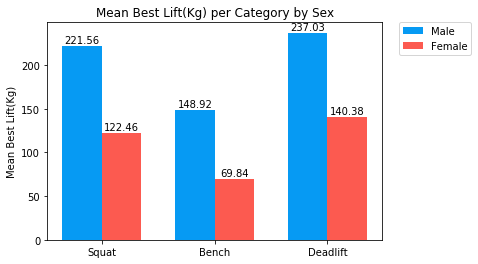

In [4]:
labels = ['Squat','Bench','Deadlift']
f_means = [122.46,69.84,140.38]
m_means = [221.56,148.92,237.03]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, m_means, width, label='Male',color='xkcd:azure')
bars2 = ax.bar(x + width/2, f_means, width, label='Female',color='xkcd:coral')

ax.set_ylabel('Mean Best Lift(Kg)')
ax.set_title('Mean Best Lift(Kg) per Category by Sex')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1.05,1),loc='upper left',borderaxespad=0)

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,1),
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

In [5]:
# Mean Best Lift(Kg) per Category by Weight Class and Sex
group_sex_weight = df[['Best3SquatKg','Best3BenchKg','Best3DeadliftKg']].groupby([df['Sex'],df['WeightClassKg']])
group_sex_weight.mean()

Best3SquatKg  Best3BenchKg  Best3DeadliftKg
Sex WeightClassKg                                             
F   43                85.489565     44.697561       102.841456
    47               102.288580     57.653573       117.656059
    52               108.597503     61.417889       125.644309
    57               112.124774     63.896604       130.768790
    63               115.895619     66.279780       135.609617
    72               122.903319     70.345959       142.109615
    84               133.520011     76.341009       151.092190
    84+              142.178094     80.819634       156.218714
M   105              233.546257    158.302647       249.277027
    120              254.208004    173.312172       261.629165
    120+             281.569923    192.120597       274.955786
    53               153.600997     94.980063       164.353797
    59               162.171151    104.634129       180.923007
    66               170.126878    111.528471       193.319182
    74               185.110617    122.344409       208.779717
    83               204.433242    135.614687       225.469756
    93               216.567762    145.657644       236.458277

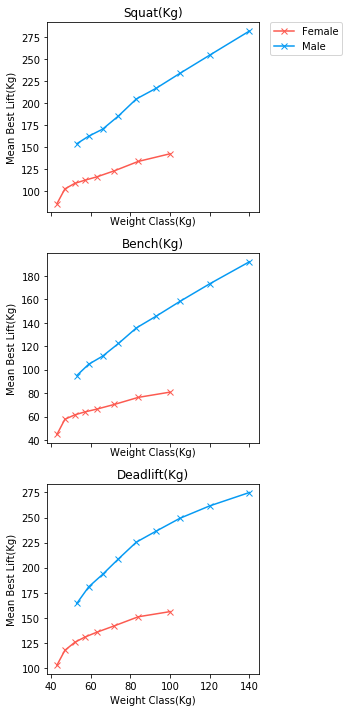

In [6]:
f_class = [43,47,52,57,63,72,84,100]
f_squat = [85.49,102.29,108.60,112.12,115.90,122.90,133.52,142.18]
f_bench = [44.70,57.65,61.42,63.90,66.28,70.35,76.34,80.82]
f_deadlift = [102.84,117.66,125.64,130.77,135.61,142.11,151.09,156.22]
m_class = [53,59,66,74,83,93,105,120,140]
m_squat = [153.60,162.17,170.13,185.11,204.43,216.57,233.55,254.21,281.57]
m_bench = [94.98,104.63,111.53,122.34,135.61,145.66,158.30,173.31,192.12]
m_deadlift = [164.35,180.92,193.32,208.78,225.47,236.46,249.28,261.63,274.96]

f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(5,10), sharex=True)

ax1.set_title('Squat(Kg)')
ax1.plot(f_class,f_squat,color='xkcd:coral', label='Female', marker = 'x')
ax1.plot(m_class,m_squat,color='xkcd:azure', label='Male', marker = 'x')
ax1.set_xlabel('Weight Class(Kg)')
ax1.set_ylabel('Mean Best Lift(Kg)')
ax1.legend(bbox_to_anchor=(1.05,1),loc=0,borderaxespad=0)

ax2.set_title('Bench(Kg)')
ax2.plot(f_class,f_bench,color='xkcd:coral', label='Female', marker = 'x')
ax2.plot(m_class,m_bench,color='xkcd:azure', label='Male', marker = 'x')
ax2.set_xlabel('Weight Class(Kg)')
ax2.set_ylabel('Mean Best Lift(Kg)')

ax3.set_title('Deadlift(Kg)')
ax3.plot(f_class,f_deadlift,color='xkcd:coral', label='Female', marker = 'x')
ax3.plot(m_class,m_deadlift,color='xkcd:azure', label='Male', marker = 'x')
ax3.set_xlabel('Weight Class(Kg)')
ax3.set_ylabel('Mean Best Lift(Kg)')

plt.tight_layout()